In [7]:
using Catlab, Catlab.Graphics
using AlgebraicPetri
using OrdinaryDiffEq, Plots
using LabelledArrays


# The Brusselator versus the Beaverator

This notebook creates a Petri net for a [Brusselator](https://en.wikipedia.org/wiki/Brusselator) reaction network and also a simplified version invented at Beaver Hollow: the **Beaverator**.   

The Brusellator on Wikipedia is this chemical reaction network:

$$  A \rightarrow X + A$$

$$  2X + Y \rightarrow 3X$$

$$  B + X \rightarrow Y + D + B$$

$$  X \rightarrow E$$

This is different from the version on Wikipedia in that the first reaction has `X+A` as output rather than just `X`, and the third has `Y+D+B` as output instead of just `Y+D`, in order to keep the concentrations of `A` and `B` constant. 

Given that `A`, `B`, `D` and `D` are serving as catalysts above (in the mathematical sense), 
we can get the same dynamics from this simplified reaction network, which we call the **Beaverator**:

$$  \rightarrow X $$

$$  2X + Y \rightarrow 3X$$

$$  X \rightarrow Y $$

$$  X \rightarrow $$

This gives the same dynamics if we suitably adjust the rate constants, as shown below.

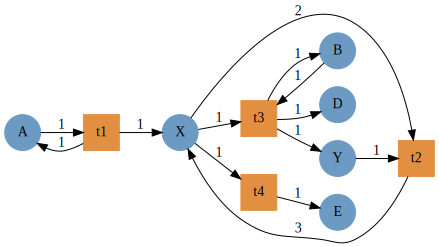

In [25]:
Brusselator= LabelledPetriNet([:A, :B, :D, :E, :X, :Y], 
    :t1 => (:A => (:X, :A)),
    :t2 => ((:X, :X, :Y) => (:X, :X, :X)),
    :t3 => ((:B, :X) => (:Y, :D, :B)),
    :t4 => (:X => :E)
)

#to_graphviz(Graph(Brusselator))
Graph(Brusselator)

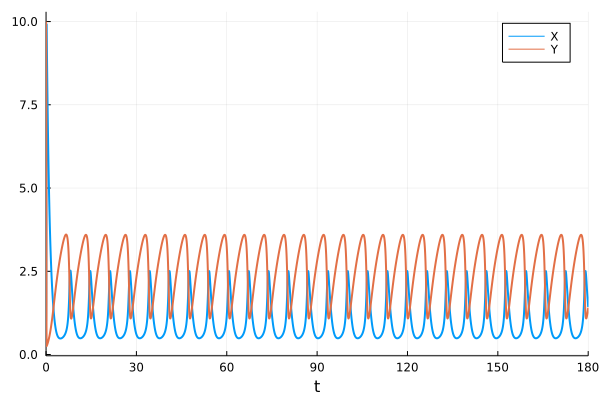

In [24]:
u0 = LVector(A = 1., B = 2.5, D = 0., E = 0., X = 1., Y = 10.)
p = LVector(t1 = 1., t2 = 1., t3 = 1., t4 = 1.)
tspan = (0.0, 180.0)

Brusselator_vf = vectorfield(Brusselator)
prob = ODEProblem(Brusselator_vf, u0, tspan, p)
sol = solve(prob, Tsit5())

plot(sol, vars = [5,6], lw = 2)

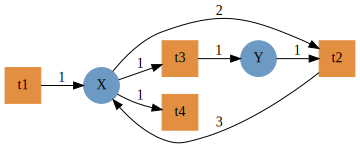

In [29]:
Beaverator= LabelledPetriNet([:X, :Y], 
    :t1 => (() => :X),
    :t2 => ((:X, :X, :Y) => (:X, :X, :X)),
    :t3 => ((:X) => (:Y)),
    :t4 => (:X => ())
)

#to_graphviz(Graph(Beaverator))
Graph(Beaverator)

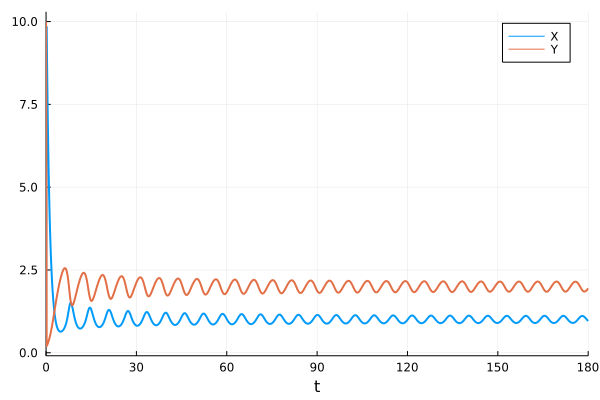

In [33]:
u0 = LVector(X = 1., Y = 10.)
p = LVector(t1 = 1., t2 = 1., t3 = 2., t4 = 1.)
tspan = (0.0, 180.0)

Beaverator_vf = vectorfield(Beaverator)
prob = ODEProblem(Beaverator_vf, u0, tspan, p)
sol = solve(prob, Tsit5())

plot(sol, vars = [1,2], lw = 2)